# DL_PROJECT

# SENTIMENT ANALYSIS ON HOTEL REVIEWS

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [56]:
df=pd.read_csv(r'C:\Users\khan\Desktop\train.csv')
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [57]:
df.drop(['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)
df.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  38932 non-null  object
 1   Is_Response  38932 non-null  object
dtypes: object(2)
memory usage: 608.4+ KB


In [59]:
df.isnull().sum()

Description    0
Is_Response    0
dtype: int64

In [60]:
# Creating dictionary
dict={'happy':0,'not happy':1}
# Mapping dictionary to Is_Response feature
df['class']=df['Is_Response'].map(dict)
df.head( )

,Description,Is_Response,class
0,The room was kind of clean but had a VERY stro...,not happy,1
1,I stayed at the Crown Plaza April -- - April -...,not happy,1
2,I booked this hotel through Hotwire at the low...,not happy,1
3,Stayed here with husband and sons on the way t...,happy,0
4,My girlfriends and I stayed here to celebrate ...,not happy,1


In [61]:
df.drop(['Is_Response'],axis=1,inplace=True)
df.head( )

,Description,class
0,The room was kind of clean but had a VERY stro...,1
1,I stayed at the Crown Plaza April -- - April -...,1
2,I booked this hotel through Hotwire at the low...,1
3,Stayed here with husband and sons on the way t...,0
4,My girlfriends and I stayed here to celebrate ...,1


In [62]:
# Text Preprocessing
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]',' ', df['Description'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [63]:
corpus[15]


'stay elan th th octob like much return day trip vega anoth night unassum appear hotel score heavili great locat spotlessli clean classic design comfort bedroom friendli manag staff jorg colleagu front desk revel untir enthusiast help recommend great restaur place visit etc manag particularli help let us complimentari room post check freshen even flight home long day enjoy southern cal sunshin'

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=10000,ngram_range=(1,3))
tfidf_word=tfidf.fit_transform(corpus).toarray()
tfidf_class=df["class"]
df['class'].value_counts()

0    26521
1    12411
Name: class, dtype: int64

In [65]:
def remove_special_chars(text):
    for remove in map(lambda r: re.compile(re.escape(r)), [',', ':', "=", "&", ";", '%', '$','@', '%', '^', '*', '(', ')', '{', '}','[', ']', '|', '/', '\\', '>', '<', '-','!', '?', '.',' — ', ' — — ', '#'," ' " ,"\""]):
        text.replace(remove, '', inplace=True)
    return text

In [66]:
def remove_tags(text):
    return re.compile( r' <[^>]+> ').sub(' ', text)

In [67]:
def remove_num(text):
    return ''.join(re.sub(r'([0–9+])',' ',text))

In [68]:
final_df=df.copy( )
#remove tags
final_df.Description=final_df.Description.apply(lambda x : remove_tags(x))
#remove numbers
final_df.Description=final_df.Description.apply(lambda x : remove_num(x))
#remove special charcters
remove_special_chars(final_df.Description)

0        The room was kind of clean but had a VERY stro...
1        I stayed at the Crown Plaza April   April   Th...
2        I booked this hotel through Hotwire at the low...
3        Stayed here with husband and sons on the way t...
4        My girlfriends and I stayed here to celebrate ...
                               ...                        
38927    We arrived late at night and walked in to a ch...
38928    The only positive impression is location and p...
38929    Traveling with friends for shopping and a show...
38930    The experience was just ok We paid extra for a...
38931    The Westin is a wonderfully restored grande da...
Name: Description, Length: 38932, dtype: object

In [69]:
import tensorflow as tf
from keras import preprocessing
import keras
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ')
tokenizer.fit_on_texts(final_df["Description"])
X = tokenizer.texts_to_sequences(final_df["Description"])
X = keras.preprocessing.sequence.pad_sequences(X,maxlen=100)
print(X[500])#changng into 500

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0   26  298    2    6   47    7    3  425   14
   21    3  566   71 1482    3   22 1021   12   21  133 2094 2568    4
    1  179   63    6    5    3  501    7   28   14    2    6  749    1
   12   33    3  528    6   56  470  371    3  109   88   11    3   12
   21  381    3  301 1192 1482    3  109  102   32    1  123  118  650
   52   94  193   70 1297    7    1 1251  496    6  289    1   12 2533
  120   88]


In [70]:
y= df['class']

In [71]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

70638

In [72]:
import pickle
# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state = 24)

In [74]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers.recurrent import LSTM

embedding_vector_features=40
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=100))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))

In [75]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 40)           2825520   
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 2,882,021
Trainable params: 2,882,021
Non-trainable params: 0
_________________________________________________________________
None


In [76]:
history=model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test, Y_test), )

Epoch 1/20
852/852 [==============================] - 145s 170ms/step - loss: 0.4054 - accuracy: 0.8205 - val_loss: 0.3574 - val_accuracy: 0.8438
Epoch 2/20
852/852 [==============================] - 147s 172ms/step - loss: 0.3019 - accuracy: 0.8789 - val_loss: 0.3454 - val_accuracy: 0.8546
Epoch 3/20
852/852 [==============================] - 152s 179ms/step - loss: 0.2646 - accuracy: 0.8966 - val_loss: 0.3755 - val_accuracy: 0.8476
Epoch 4/20
852/852 [==============================] - 149s 174ms/step - loss: 0.2364 - accuracy: 0.9058 - val_loss: 0.3809 - val_accuracy: 0.8510
Epoch 5/20
852/852 [==============================] - 144s 169ms/step - loss: 0.2087 - accuracy: 0.9213 - val_loss: 0.3899 - val_accuracy: 0.8502
Epoch 6/20
852/852 [==============================] - 147s 173ms/step - loss: 0.1819 - accuracy: 0.9326 - val_loss: 0.4513 - val_accuracy: 0.8479
Epoch 7/20
852/852 [==============================] - 146s 172ms/step - loss: 0.1625 - accuracy: 0.9384 - val_loss: 0.4851 -

In [77]:
# New review
string11=''' This hotel is awesome I love the service Anthony is really a great guy you see at the front desk! It is close to everything and is wonderful for kids I love it. The best hotel ever but wonderful cleanliness and quality great hotel for couples and singles.'''
# Evaluating trained mode with new review
x_1=tokenizer.texts_to_sequences([string11])
x_1 = keras.preprocessing.sequence.pad_sequences(x_1,maxlen=100)
model.predict(x_1)

array([[0.00021699]], dtype=float32)

In [78]:
from keras.layers import Dropout

embedding_vector_features=40
model_2=Sequential()
model_2.add(Embedding(vocab_size,embedding_vector_features,input_length=100))
model_2.add(Dropout(0.5))
model_2.add(LSTM(100))
model_2.add(Dropout(0.5))
model_2.add(Dense(1,activation='sigmoid'))
# Model compilation
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model_2.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 40)           2825520   
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 40)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 2,882,021
Trainable params: 2,882,021
Non-trainable params: 0
_________________________________________________________________
None


In [79]:
history_2=model_2.fit(X_train, Y_train,
batch_size=32,
epochs=20,
validation_data=(X_test, Y_test),
                     )

Epoch 1/20
852/852 [==============================] - 405s 476ms/step - loss: 0.4158 - accuracy: 0.8180 - val_loss: 0.4011 - val_accuracy: 0.8348
Epoch 2/20
852/852 [==============================] - 142s 166ms/step - loss: 0.3209 - accuracy: 0.8719 - val_loss: 0.3456 - val_accuracy: 0.8574
Epoch 3/20
852/852 [==============================] - 156s 183ms/step - loss: 0.2890 - accuracy: 0.8844 - val_loss: 0.3501 - val_accuracy: 0.8574
Epoch 4/20
852/852 [==============================] - 142s 167ms/step - loss: 0.2705 - accuracy: 0.8933 - val_loss: 0.3423 - val_accuracy: 0.8550
Epoch 5/20
852/852 [==============================] - 140s 165ms/step - loss: 0.2550 - accuracy: 0.9003 - val_loss: 0.3516 - val_accuracy: 0.8589
Epoch 6/20
852/852 [==============================] - 140s 164ms/step - loss: 0.2411 - accuracy: 0.9067 - val_loss: 0.3580 - val_accuracy: 0.8532
Epoch 7/20
852/852 [==============================] - 134s 157ms/step - loss: 0.2256 - accuracy: 0.9143 - val_loss: 0.3884 -

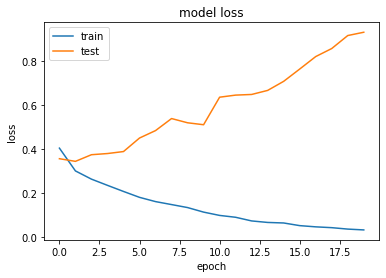

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

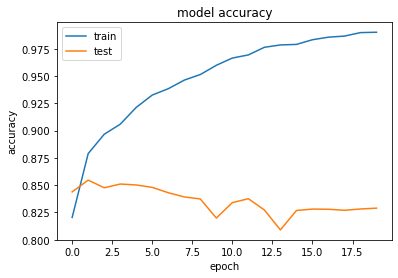

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
from keras.layers import Bidirectional

embedding_vector_features=40
model_3=Sequential()
model_3.add(Embedding(vocab_size,embedding_vector_features,input_length=100))
model_3.add(Dropout(0.65))
model_3.add(Bidirectional(LSTM(100)))
model_3.add(Dropout(0.65))
model_3.add(Dense(1,activation='sigmoid'))
# Model Compilation
model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model_3.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 40)           2825520   
_________________________________________________________________
dropout_7 (Dropout)          (None, 100, 40)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               112800    
_________________________________________________________________
dropout_8 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 2,938,521
Trainable params: 2,938,521
Non-trainable params: 0
_________________________________________________________________
None


In [83]:
history_2=model_3.fit(X_train, Y_train,
batch_size=32,
epochs=20,
validation_data=(X_test, Y_test),
)

Epoch 1/20
852/852 [==============================] - 211s 248ms/step - loss: 0.4399 - accuracy: 0.7987 - val_loss: 0.3895 - val_accuracy: 0.8453
Epoch 2/20
852/852 [==============================] - 192s 225ms/step - loss: 0.3382 - accuracy: 0.8639 - val_loss: 0.3431 - val_accuracy: 0.8521
Epoch 3/20
852/852 [==============================] - 191s 224ms/step - loss: 0.3040 - accuracy: 0.8761 - val_loss: 0.3323 - val_accuracy: 0.8569
Epoch 4/20
852/852 [==============================] - 183s 215ms/step - loss: 0.2925 - accuracy: 0.8825 - val_loss: 0.3391 - val_accuracy: 0.8572
Epoch 5/20
852/852 [==============================] - 185s 218ms/step - loss: 0.2738 - accuracy: 0.8913 - val_loss: 0.3379 - val_accuracy: 0.8575
Epoch 6/20
852/852 [==============================] - 191s 224ms/step - loss: 0.2650 - accuracy: 0.8943 - val_loss: 0.3410 - val_accuracy: 0.8571
Epoch 7/20
852/852 [==============================] - 192s 225ms/step - loss: 0.2524 - accuracy: 0.9000 - val_loss: 0.3653 -

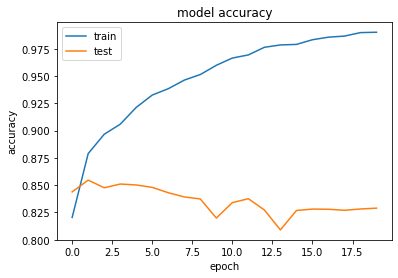

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

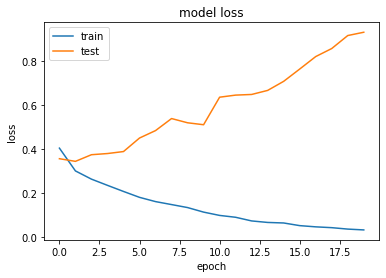

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()